In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Retina display
%config InlineBackend.figure_format = 'retina'


In [2]:
from tueplots import bundles
plt.rcParams.update(bundles.beamer_moml())


# Also add despine to the bundle using rcParams
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

# Increase font size to match Beamer template
plt.rcParams['font.size'] = 16
# Make background transparent
plt.rcParams['figure.facecolor'] = 'none'

### Discrete distributions

#### Bernoulli distribution

The PDF of the Bernoulli distribution is given by

$$
f(x) = p^x (1-p)^{1-x}
$$

where $x \in \{0, 1\}$ and $p \in [0, 1]$.


In [3]:
bernoulli = torch.distributions.Bernoulli(probs=0.3)
bernoulli.probs

tensor(0.3000)

([<matplotlib.axis.XTick at 0x7f534dd60b20>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

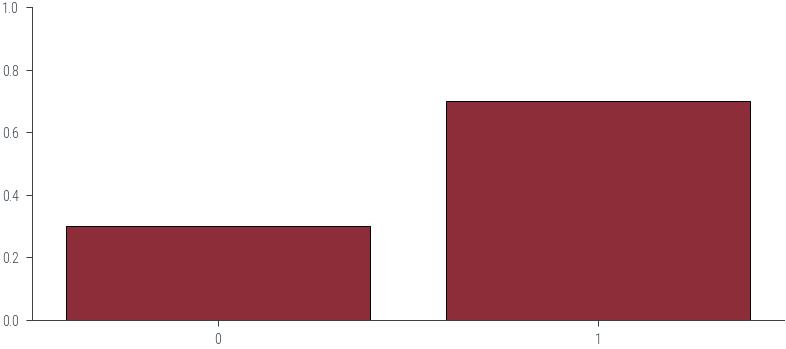

In [4]:
# Plot PDF
p_0 = bernoulli.probs.item()
p_1 = 1 - p_0

plt.bar([0, 1], [p_0, p_1], color='C0', edgecolor='k')
plt.ylim(0, 1)
plt.xticks([0, 1], ['0', '1'])

In [5]:
### Careful!
bernoulli = torch.distributions.Bernoulli(logits=0.3)
bernoulli.probs

tensor(0.5744)

Logits?!

Probs range from 0 to 1, logits range from -inf to inf. Logits are the inverse of the sigmoid function.

The sigmoid function is defined as:

$$\sigma(x) = \frac{1}{1 + e^{-x}}$$

The inverse of the sigmoid function is defined as:

$$\sigma^{-1}(x) = \log \frac{x}{1 - x}$$




In [6]:
### Sampling
bernoulli.sample()

tensor(0.)

In [7]:
bernoulli.sample((10,))

tensor([1., 0., 1., 0., 1., 1., 1., 1., 1., 1.])

In [8]:
data = bernoulli.sample((1000,))
data

tensor([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
        0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1.,
        1., 0., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.,
        1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 1.,
        1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0.,
        0., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
        1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1.,
        1., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0.,
        0., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1.,
        1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1.,
        1., 1., 0., 1., 1., 1., 0., 0., 

In [9]:
### Count number of 1s
data.sum()

tensor(556.)

In [10]:
### IID sampling
size = 1000
data = torch.empty(size)
for s_num in range(size):
    dist = torch.distributions.Bernoulli(probs=0.3) # Each sample uses the same distribution (Identical)
    data[s_num] = dist.sample() # Each sample is independent (Independent)

In [11]:
### Dependent sampling
size = 1000

### If previous sample was 1, next sample is 1 with probability 0.9
### If previous sample was 1, next sample is 0 with probability 0.1
### If previous sample was 0, next sample is 0 with probability 0.8
### If previous sample was 0, next sample is 1 with probability 0.2

In [12]:
### Categorical distribution

p1 = 0.2
p2 = 0.3
p3 = 0.5

categorical = torch.distributions.Categorical(probs=torch.tensor([p1, p2, p3]))
categorical.probs

tensor([0.2000, 0.3000, 0.5000])

([<matplotlib.axis.XTick at 0x7f534bc85c10>,
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2')])

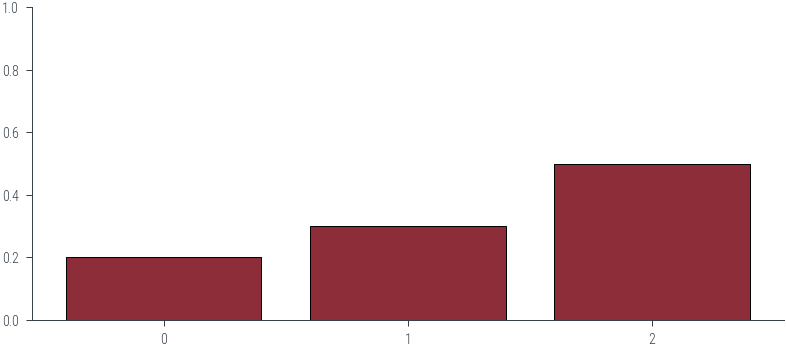

In [13]:
# Plot PDF

plt.bar([0, 1, 2], [p1, p2, p3], color='C0', edgecolor='k')
plt.ylim(0, 1)
plt.xticks([0, 1, 2], ['0', '1', '2'])

In [14]:
### Uniform distribution

uniform = torch.distributions.Uniform(low=0, high=1)

In [15]:
uniform.sample()

tensor(0.2577)

In [16]:
uniform.support

Interval(lower_bound=0.0, upper_bound=1.0)

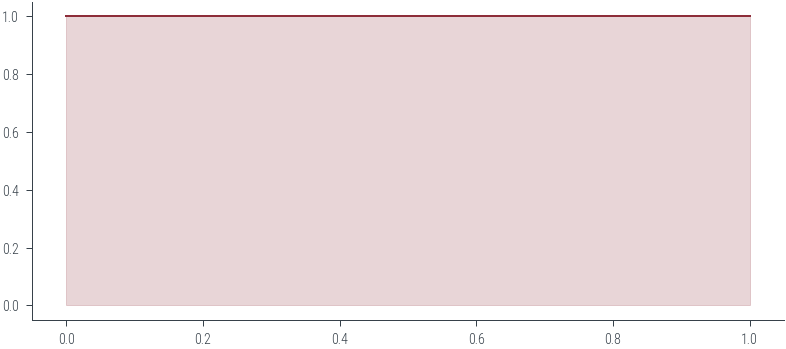

In [57]:
### Plot PDF
xs = torch.linspace(0.0, 0.99999, 500)
ys = uniform.log_prob(xs).exp()

plt.plot(xs, ys, color='C0')
# Filled area
plt.fill_between(xs, ys, color='C0', alpha=0.2)


In [18]:
### Why log_prob? and not prob?

In [19]:
### Normal distribution

normal = torch.distributions.Normal(loc=0, scale=1)


In [20]:
normal.support

Real()

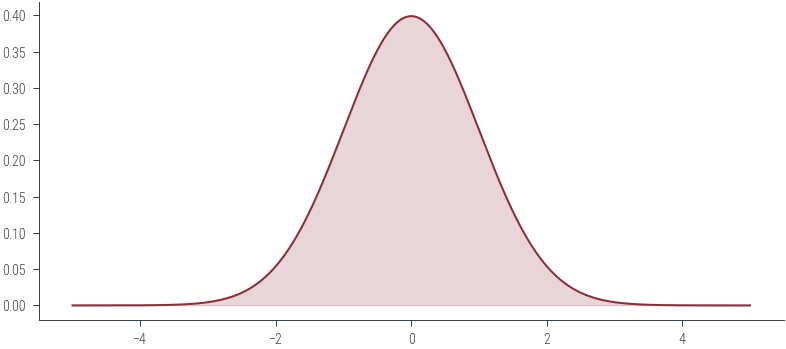

In [58]:
### Plot PDF
xs = torch.linspace(-5, 5, 500)
ys = normal.log_prob(xs).exp()
plt.plot(xs, ys, color='C0')
# Filled area
plt.fill_between(xs, ys, color='C0', alpha=0.2)

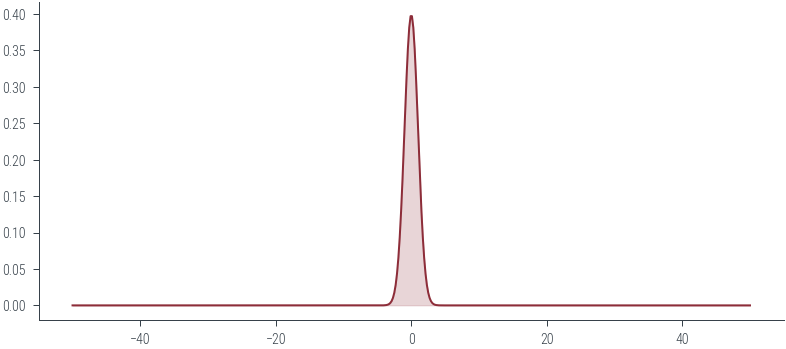

In [59]:
xs = torch.linspace(-50, 50, 500)
ys = normal.log_prob(xs).exp()
plt.plot(xs, ys, color='C0')
# Filled area
plt.fill_between(xs, ys, color='C0', alpha=0.2)

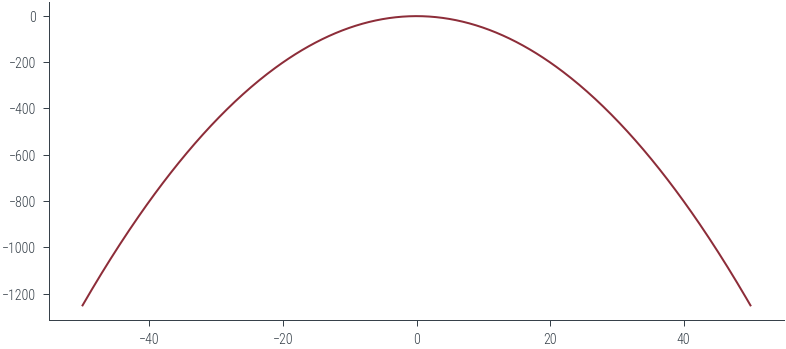

In [23]:
xs = torch.linspace(-50, 50, 500)
ys = normal.log_prob(xs)
plt.plot(xs, ys, color='C0')

In [24]:
samples = normal.sample((1000,))
samples[:20]

tensor([ 0.1860, -1.3319,  0.3585,  0.0197, -0.8920,  0.3594,  1.4823,  0.4391,
        -0.7085,  0.9405, -0.0467, -0.5588,  0.3798, -0.5605,  1.0027,  1.4456,
         0.8330, -0.0784,  0.4536,  1.2500])

(array([0.00650792, 0.        , 0.        , 0.01301585, 0.        ,
        0.00650792, 0.01301585, 0.00650792, 0.        , 0.00650792,
        0.01301585, 0.01952377, 0.03253961, 0.05206338, 0.08460299,
        0.08460299, 0.11063468, 0.14968222, 0.2017456 , 0.17571391,
        0.24079304, 0.37095158, 0.29936432, 0.34491989, 0.43603081,
        0.37745947, 0.42301492, 0.38396739, 0.32539609, 0.29285651,
        0.35793574, 0.33841184, 0.27333275, 0.18872975, 0.19523768,
        0.20825352, 0.12365053, 0.11714251, 0.04555546, 0.05857135,
        0.02603169, 0.03904747, 0.03253961, 0.00650792, 0.00650792,
        0.00650792, 0.        , 0.        , 0.00650792, 0.00650792]),
 array([-4.119436  , -3.965777  , -3.812118  , -3.6584592 , -3.5048003 ,
        -3.3511415 , -3.1974826 , -3.0438237 , -2.8901649 , -2.7365057 ,
        -2.5828469 , -2.429188  , -2.2755291 , -2.1218703 , -1.9682114 ,
        -1.8145525 , -1.6608937 , -1.5072348 , -1.353576  , -1.1999171 ,
        -1.0462582 , -0.89

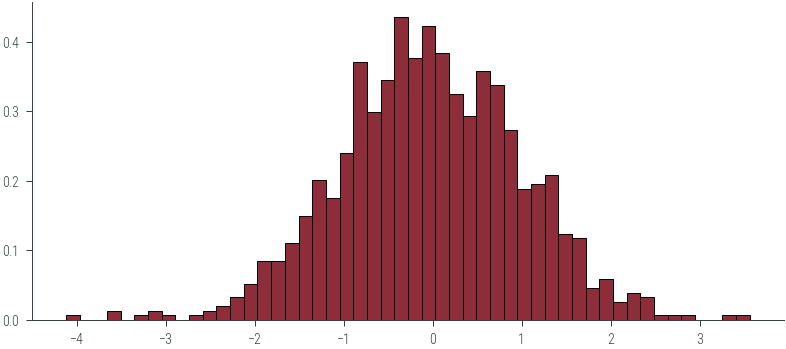

In [25]:
plt.hist(samples.numpy(), bins=50, density=True, edgecolor='k')

(array([0.00390475, 0.        , 0.00780951, 0.0078095 , 0.00780951,
        0.00390475, 0.01171426, 0.03904755, 0.07028552, 0.11323783,
        0.11714259, 0.20304725, 0.27333264, 0.33580883, 0.4060943 ,
        0.39438009, 0.38266578, 0.30457076, 0.33580875, 0.28895178,
        0.18742814, 0.16399962, 0.11714259, 0.05076181, 0.03514276,
        0.02342853, 0.0078095 , 0.00390475, 0.        , 0.00780951]),
 array([-4.119436  , -3.8633378 , -3.6072395 , -3.3511415 , -3.0950432 ,
        -2.8389452 , -2.5828469 , -2.3267488 , -2.0706508 , -1.8145525 ,
        -1.5584544 , -1.3023562 , -1.0462582 , -0.79016   , -0.5340619 ,
        -0.27796376, -0.02186562,  0.23423252,  0.49033064,  0.7464288 ,
         1.0025269 ,  1.258625  ,  1.5147232 ,  1.7708213 ,  2.0269194 ,
         2.2830176 ,  2.5391157 ,  2.795214  ,  3.051312  ,  3.3074102 ,
         3.5635083 ], dtype=float32),
 <BarContainer object of 30 artists>)

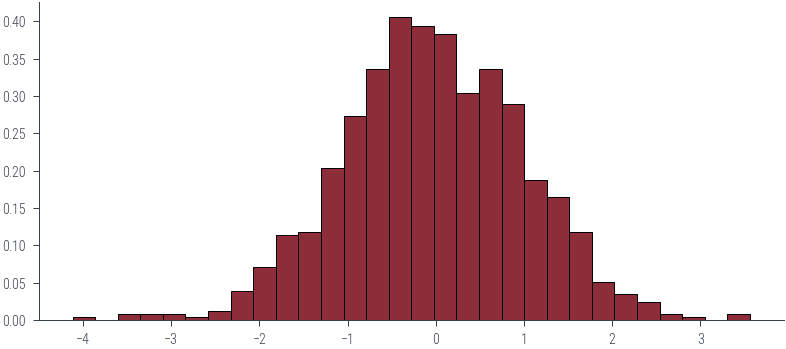

In [27]:
plt.hist(samples.numpy(), bins=30, density=True, edgecolor='k')

<AxesSubplot:ylabel='Density'>

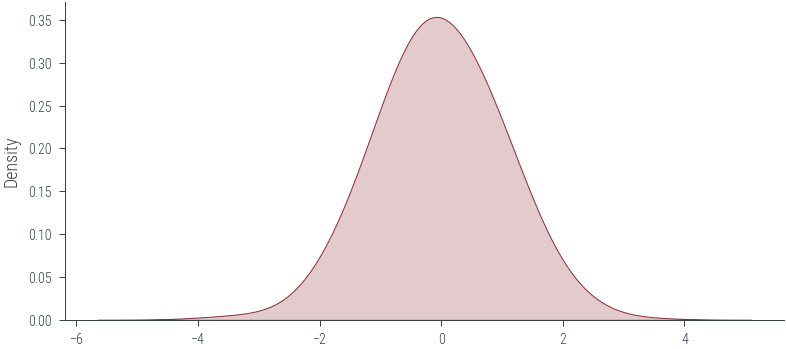

In [31]:
import seaborn as sns
sns.kdeplot(samples.numpy(), bw_adjust=2.0, shade=True)

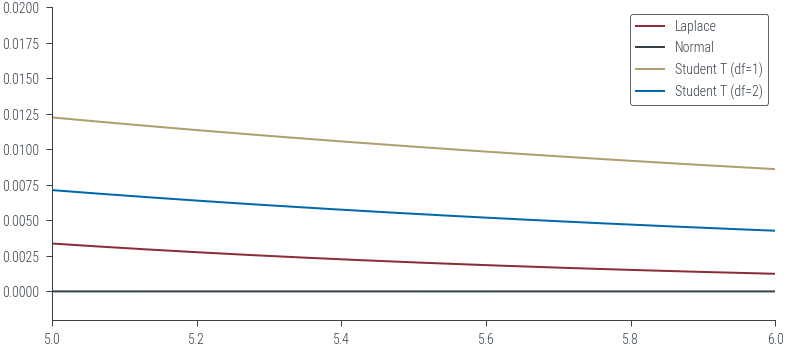

In [53]:
### Laplace distribution v/s Normal distribution

laplace = torch.distributions.Laplace(loc=0, scale=1)
normal = torch.distributions.Normal(loc=0, scale=1)
student_t_1 = torch.distributions.StudentT(df=1)
student_t_2 = torch.distributions.StudentT(df=2)


xs = torch.linspace(-6, 6, 500)
ys_laplace = laplace.log_prob(xs).exp()
plt.plot(xs, ys_laplace, color='C0', label='Laplace')

ys_normal = normal.log_prob(xs).exp()
plt.plot(xs, ys_normal, color='C1', label='Normal')

ys_student_t_1 = student_t_1.log_prob(xs).exp()
plt.plot(xs, ys_student_t_1, color='C2', label='Student T (df=1)')

ys_student_t_2 = student_t_2.log_prob(xs).exp()
plt.plot(xs, ys_student_t_2, color='C3', label='Student T (df=2)')

plt.legend()

zoom  = True
if zoom:
    plt.xlim(5, 6)
    plt.ylim(-0.002, 0.02)

In [54]:
### Beta distribution

beta = torch.distributions.Beta(concentration1=2, concentration0=2)
beta.support

Interval(lower_bound=0.0, upper_bound=1.0)

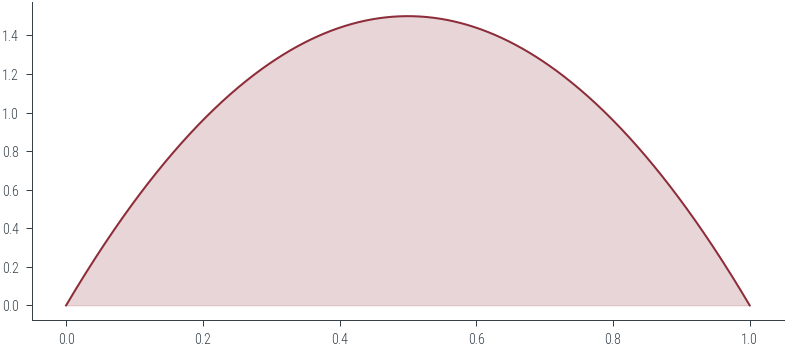

In [56]:
# PDF
xs = torch.linspace(0, 1, 500)
ys = beta.log_prob(xs).exp()
plt.plot(xs, ys, color='C0')
# Filled area
plt.fill_between(xs, ys, color='C0', alpha=0.2)

In [66]:
s = beta.sample()
s

tensor(0.3356)

In [62]:
# Add widget to play with parameters
from ipywidgets import interact

def plot_beta(a, b):
    beta = torch.distributions.Beta(concentration1=a, concentration0=b)
    xs = torch.linspace(0, 1, 500)
    ys = beta.log_prob(xs).exp()
    plt.plot(xs, ys, color='C0')
    # Filled area
    plt.fill_between(xs, ys, color='C0', alpha=0.2)

interact(plot_beta,a=(0.1, 10, 0.1), b=(0.1, 10, 0.1))

interactive(children=(FloatSlider(value=5.0, description='a', max=10.0, min=0.1), FloatSlider(value=5.0, descr…

<function __main__.plot_beta(a, b)>

In [63]:
### Dirichlet distribution

dirichlet = torch.distributions.Dirichlet(concentration=torch.tensor([2.0, 2.0, 2.0]))
dirichlet.support

Simplex()

In [65]:
s = dirichlet.sample()
print(s, s.sum())

tensor([0.2924, 0.3254, 0.3821]) tensor(1.)


In [67]:
s = dirichlet.sample()
print(s, s.sum())

tensor([0.3898, 0.1071, 0.5030]) tensor(1.)


In [68]:
dirichlet2 = torch.distributions.Dirichlet(concentration=torch.tensor([0.8, 0.1, 0.1]))
s = dirichlet2.sample()
print(s, s.sum())

tensor([0.8190, 0.0111, 0.1699]) tensor(1.)
